In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Partie I

In [52]:
titanic =  sns.load_dataset('titanic')
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


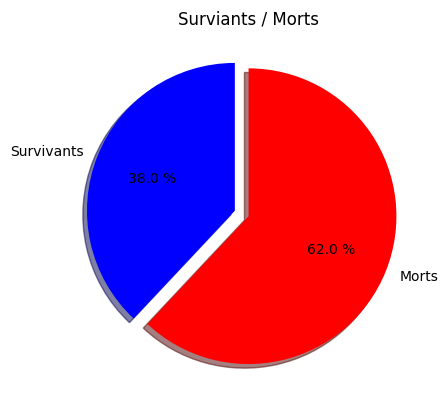

In [53]:
# Quelques visualisations pertinentes...

# Pourcentage des personnes ayant survécu...

total = len(titanic)
mask =  (titanic['survived'] == 1)
survived =  round( mask.sum()/total, 2 ) * 100
dead = 100 - survived

colors = ['blue', 'red']
x = [survived, dead]

labels = 'Survivants', 'Morts'
explode = (0.1, 0)

plt.pie(x, explode=explode, labels=labels, autopct='%.1f %%',
        shadow=True, startangle=90, colors=colors)
plt.title('Surviants / Morts');

<Axes: xlabel='survived', ylabel='age'>

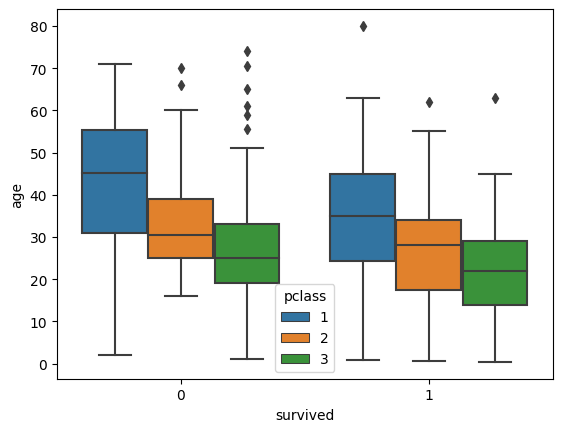

In [54]:
#Répartition des morts et survivants en fonction de l'age et de la classe

sns.boxplot(x='survived', y='age', hue='pclass',  data=titanic)

<Axes: xlabel='survived', ylabel='age'>

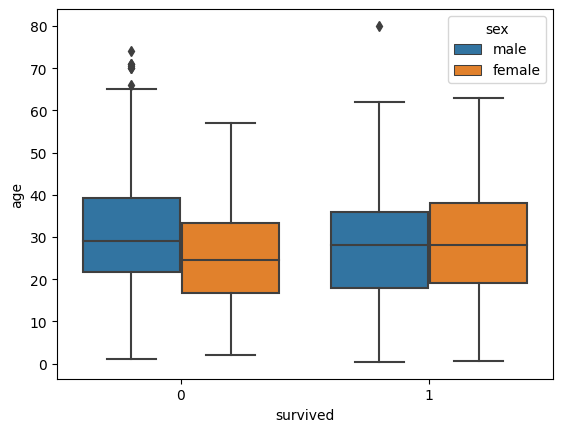

In [55]:
# En fonction de l'âge et du sexe

sns.boxplot(x='survived', y='age', hue="sex",  data=titanic)

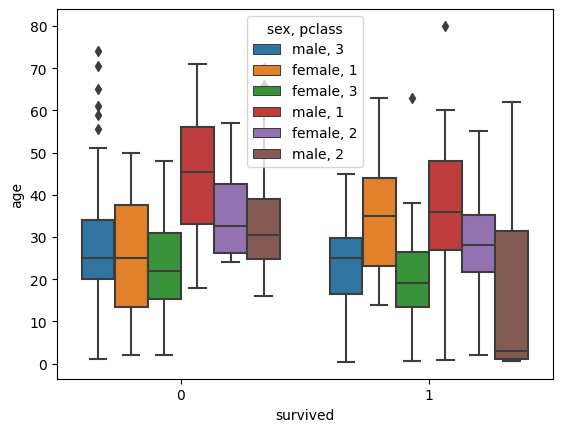

In [56]:
# Répartition des morts et survivants en fonction de l'âge du sexe et de la classe...
hue = titanic[['sex', 'pclass']].apply(
    lambda row: f"{row.sex}, {row.pclass}", axis=1)
hue.name = 'sex, pclass'
sns.boxplot(x='survived', y='age', hue=hue, data=titanic);